In [3]:
!pip install gymnasium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.6 MB/s eta 0:00:00


State: [0 0], Action: 0, Reward: 0, Next State: [0 0]


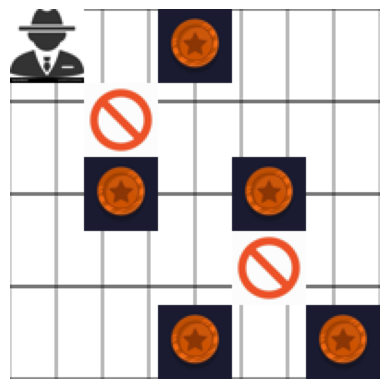

State: [0 0], Action: 2, Reward: 0, Next State: [1 0]


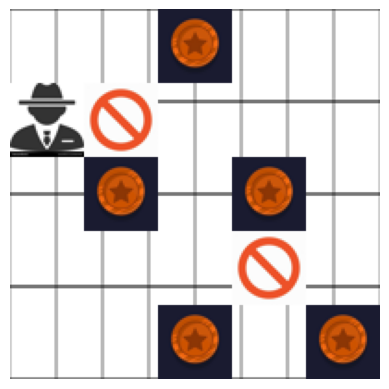

State: [1 0], Action: 0, Reward: 0, Next State: [0 0]


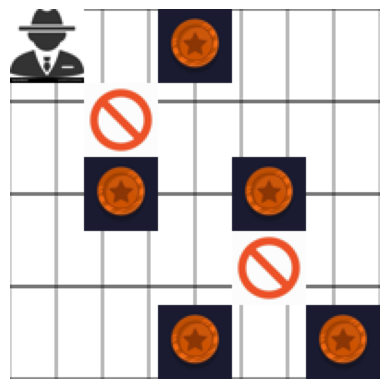

State: [0 0], Action: 1, Reward: 0, Next State: [0 1]


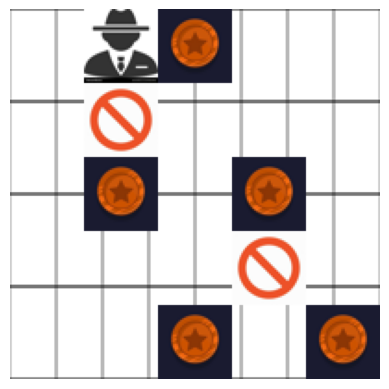

State: [0 1], Action: 2, Reward: 0, Next State: [1 1]


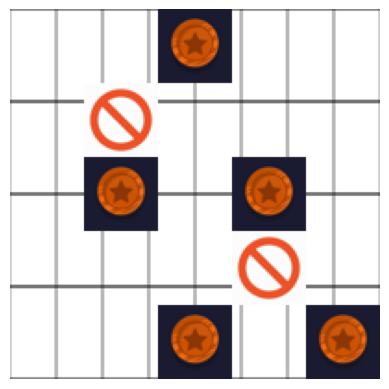

State: [1 1], Action: 1, Reward: 0, Next State: [1 2]


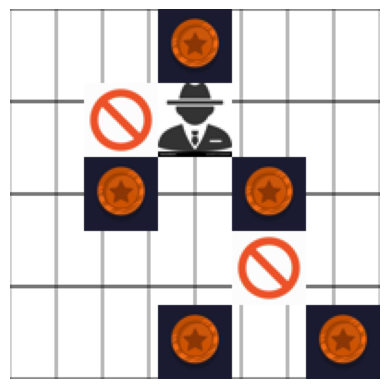

State: [1 2], Action: 2, Reward: 0, Next State: [2 2]


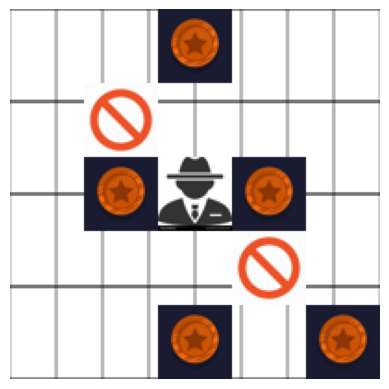

State: [2 2], Action: 2, Reward: 0, Next State: [3 2]


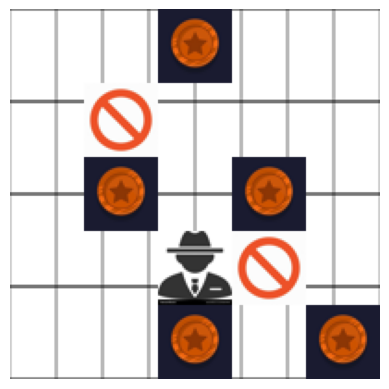

State: [3 2], Action: 1, Reward: 0, Next State: [3 3]


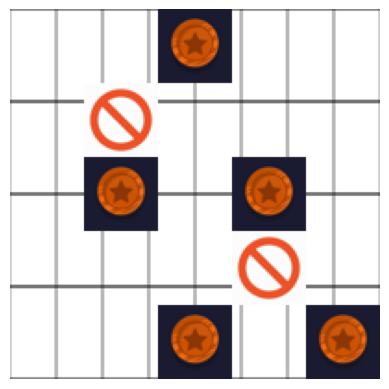

State: [3 3], Action: 2, Reward: 0, Next State: [4 3]


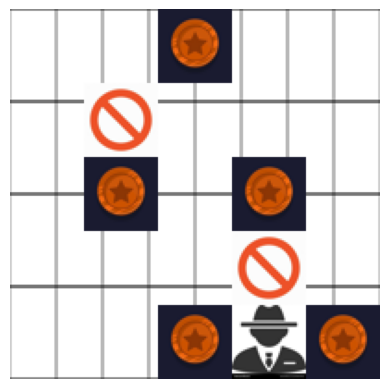

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from gymnasium import Env
from gymnasium.spaces import Discrete, Box

class RL_env(Env):
    def __init__(self):
        self.grid_size = 5
        self.state_space = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.action_space = Discrete(4)  # Actions => 0=Up, 1=Right, 2=Down, 3=Left
        self.observation_space = Box(low=0, high=self.grid_size-1, shape=(2,), dtype=int)

        # Load images (Ensure these files are uploaded to Colab)
        self.agent_img = Image.open('/content/sample_data/agent-icon-vector-15041758.jpg').resize((40, 40))  # Resize agent image
        self.agent_img_goal = Image.open('/content/sample_data/goal-flag-icon-style-free-vector.jpg').resize((40, 40))  # Resize goal image
        self.bg_img = Image.open('/content/sample_data/Grid-Pattern-PNG-Image-Background.jpg').resize((self.grid_size * 40, self.grid_size * 40))  # Resize background to grid size
        self.reward_img = Image.open('/content/sample_data/game-achievement-badge-or-rank-icon-cartoon-bronze-award-or-medal-reward-level-up-coin-with-star-and-element-for-ui-asset-trophy-symbol-illustration-vector.jpg').resize((40, 40))  # Resize reward image
        self.obstacle_img = Image.open('/content/sample_data/OIP.jpg').resize((40, 40))  # Resize obstacle image

        # Rewards and obstacles in the grid
        self.rewards = {
            (0, 2): -5,
            (2, 3): -6,
            (2, 1): +5,
            (4, 2): +7,
            (4, 4): +10
        }

        self.obstacles = [(1, 1), (3, 3)]  # Example obstacles
        self.state = (0, 0)
        self.goal_state = (4, 4)

    def reset(self):
        self.state = (0, 0)
        return np.array(self.state, dtype=int)

    def step(self, action):
        row, col = self.state
        if action == 0 and row > 0:         # Up
            row -= 1
        elif action == 1 and col < self.grid_size - 1:  # Right
            col += 1
        elif action == 2 and row < self.grid_size - 1:  # Down
            row += 1
        elif action == 3 and col > 0:       # Left
            col -= 1
        self.state = (row, col)
        reward = self.rewards.get(self.state, 0)
        done = self.state == self.goal_state
        return np.array(self.state, dtype=int), reward, done, {}

    def render(self):
    # Start by copying the background image (the full grid)
      grid = self.bg_img.copy()
      grid_arr = np.array(grid)

      # Convert images to RGB in case they have alpha (RGBA) channel
      agent_img_rgb = self.agent_img.convert("RGB")
      agent_img_goal_rgb = self.agent_img_goal.convert("RGB")
      reward_img_rgb = self.reward_img.convert("RGB")
      obstacle_img_rgb = self.obstacle_img.convert("RGB")

      # Place the agent image on the current position
      agent_x, agent_y = self.state
      grid_arr[agent_x * 40: (agent_x + 1) * 40, agent_y * 40: (agent_y + 1) * 40] = np.array(agent_img_rgb)

      # Place the goal image at the goal state
      goal_x, goal_y = self.goal_state
      grid_arr[goal_x * 40: (goal_x + 1) * 40, goal_y * 40: (goal_y + 1) * 40] = np.array(agent_img_goal_rgb)

      # Place reward images at specific positions
      for position, reward in self.rewards.items():
          reward_x, reward_y = position
          grid_arr[reward_x * 40: (reward_x + 1) * 40, reward_y * 40: (reward_y + 1) * 40] = np.array(reward_img_rgb)

      # Place obstacles in the grid
      for position in self.obstacles:
          obstacle_x, obstacle_y = position
          grid_arr[obstacle_x * 40: (obstacle_x + 1) * 40, obstacle_y * 40: (obstacle_y + 1) * 40] = np.array(obstacle_img_rgb)

      # Render the image
      plt.imshow(grid_arr)
      plt.axis('off')  # Turn off axes for better visualization
      plt.show()


# Running the environment with random agent actions
env = RL_env()
state = env.reset()
for _ in range(10):
    action = env.action_space.sample()  # Random action
    next_state, reward, done, _ = env.step(action)
    print(f"State: {state}, Action: {action}, Reward: {reward}, Next State: {next_state}")
    env.render()  # Render the environment with the updated agent position
    state = next_state
    if done:
        print("Reached the goal!")
        break
